# Линейная алгебра. Лабораторная работа 1, осень 2022


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [ ]:
#1
import numpy as np
ans = np.zeros((3, 4))
print(ans)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
#2
elem = np.array([i for i in range(1, 6)])
ans = np.diagflat(elem)
print(ans)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [ ]:
#3
elem = np.array([i for i in range(1, 6)])
ans = np.diagflat(elem)
tr = np.trace(ans)
print(tr)

15


In [ ]:
#4
from numpy import linalg as LA
elem = np.array([i for i in range(1, 6)])
mt = np.diagflat(elem)
ans = LA.inv(mt)
print(ans)

[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [ ]:
#5
import numpy as np
import random
X = np.random.random((4, 5))
print(X)

[[0.94081057 0.51625604 0.4906219  0.54546328 0.62671569]
 [0.41128212 0.03620628 0.69190502 0.02929673 0.18141225]
 [0.05349923 0.7207209  0.19740176 0.27688038 0.85637312]
 [0.99429894 0.17283475 0.899173   0.48609704 0.79495098]]


In [ ]:
#6
from numpy import linalg as LA
minor_X = X[np.ix_([1, 2], [0, 1])]
print("Искомая подматрица - ", minor_X)
opredelitel_minor_X = LA.det(minor_X)
print("Определитель этой подматрицы - ", opredelitel_minor_X)

Искомая подматрица -  [[0.41128212 0.03620628]
 [0.05349923 0.7207209 ]]
Определитель этой подматрицы -  0.2944826087733935


In [ ]:
#7
X_T = X.T
ans = X_T.dot(X)
print(ans)

[[2.04577007 0.71099755 1.65075804 1.0233655  1.50046658]
 [0.71099755 0.81714165 0.57601774 0.56622737 1.08471518]
 [1.65075804 0.57601774 1.56692195 0.77962879 1.31684851]
 [1.0233655  0.56622737 0.77962879 0.61134156 0.97070141]
 [1.50046658 1.08471518 1.31684851 0.97070141 1.79100494]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
from numpy import linalg as sla

def my_det(X):
    if len(X[0, :]) != len(X[:, 0]):
        raise  "ValueError"
    else:
        m = len(X)
        ans = np.longdouble(1)
        for i in range(m - 1):
            glav = np.longdouble(X[i, i])
            if glav != 0:
                for j in range(i + 1, m):
                    poboch = np.longdouble(X[j, i])
                    for h in range(i, m):
                        X[j, h] = np.longdouble(np.longdouble(X[j, h]) - np.longdouble( np.longdouble(X[i, h]) * poboch / glav))
            else:
                check = 0
                for j in range(i + 1, m):
                    if X[j, i] != 0:
                        Xzam1 = X[i, :].copy()
                        Xzam2 = X[j, :].copy()
                        X[i, :] = Xzam2
                        X[j, :] = Xzam1
                        ans *= -1
                        check = 1
                if check == 0:
                    return 0
        for i in range(m):
            ans *= np.longdouble(X[i, i])
        det = ans

    return det

Простая проверка:

In [ ]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
# Запустите этот блок кода
for _ in range(100):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print(my_det(X) - sla.det(X), my_det(X), sla.det(X))
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

13.8 µs ± 5.54 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
899 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
196 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
836 ms ± 9.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
38.2 ms ± 842 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
14min 22s ± 5.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


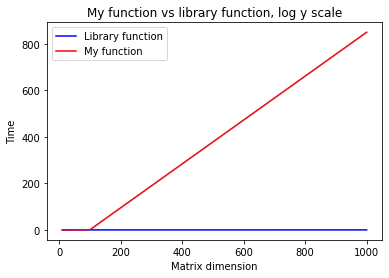

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

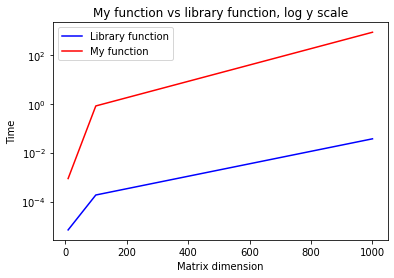

In [19]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [17]:
A, B = np.array([[1, 0], [10 ** 20, 1]]), np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
C, D = np.array([[1, 0], [10 ** 20, 1]], float), np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]], float)
print(A.dot(B))
print(C.dot(D))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Правильный вариант, где используются целые числа, потому что на месте [2, 2] там получается верный ответ, а во втором варианте ответ 0, он неверный

**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [20]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim), int)
    for i in range(dim):
        P[0, i] = 1
    for i in range(1, dim):
        P[i, 0] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i, j - 1] + P[i - 1, j]
    
    return P

print(my_pascal(10))


[[    1     1     1     1     1     1     1     1     1     1]
 [    1     2     3     4     5     6     7     8     9    10]
 [    1     3     6    10    15    21    28    36    45    55]
 [    1     4    10    20    35    56    84   120   165   220]
 [    1     5    15    35    70   126   210   330   495   715]
 [    1     6    21    56   126   252   462   792  1287  2002]
 [    1     7    28    84   210   462   924  1716  3003  5005]
 [    1     8    36   120   330   792  1716  3432  6435 11440]
 [    1     9    45   165   495  1287  3003  6435 12870 24310]
 [    1    10    55   220   715  2002  5005 11440 24310 48620]]


Чему равен её определитель? **Строго** поясните свой ответ.

----
Давайте приведем нашу матрицу к ступенчатому виду следующим образом. Начинаем с самой последней строки n. Из нее вычитаем строку n - 1. И так далее, пока не вычтем из 2 строки 1. Поймем, что будет происходить:


$$\begin{matrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & ... \\
1 & 2 & 3 & 4 & 5 & 6 & 7 & ... \\
1 & 3 & 6 & 10 & 15 & 21 & 28& ... \\
1 & 4 & 10& 20 & 35 & 56 & 84& ... \\
..&.. &.. & .. &.. &.. &.. &
\end{matrix}
\rightarrow
\begin{matrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & ... \\
0 & 1 & 2 & 3 & 4 & 5 & 6 & ... \\
0 & 1 & 3 & 6 & 10 & 15 & 21& ... \\
0 & 1 & 4 & 10& 20 & 35 & 56& ... \\
..&.. &.. & .. &.. &.. &.. &
\end{matrix}$$
Для начала сделаем ремарку и увидим, что $P_{i,j} = P_{i-1,j} + P{i, j -1}$ для $j, i > 1$ по свойству $C_n^k$.
Рассмотрим, чему после одного вышеописаного шага равен $P_{i,j}^{new} = P_{i,j} - P{i - 1, j} = P_{i, j - 1}$ при $ i,j > 0$
То есть при нашем шаге У нас образуется следующая матрица
$$\begin{matrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & ... \\
0 &  \\
0 & & & P^{new}\\
0 &  \\
..&
\end{matrix}, dim(P^{new}) = dim(P) -1$$. При этом, $P^{new}$ - тоже матрица паскаля и это очевидно.
Давайте сделаем наш шаг для матрицы $P^{new}$. И так далее, пока мы можем выполнять наш алгоритм. Когда это произойдет? Когда $dim(P^{new}) = 1$. А это просто матрица из одной единицы. То есть, остановимся мы тогда, когда получим матрицу такого вида: $$\begin{matrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & ... & 1 \\
0 & 1 & 1 & 1 & 1 & 1 & 1 & ... & 1 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & ... & 1\\
0 & 0 & 0 & 1 & 1 & 1 & 1& ... & 1\\
..&.. &.. & .. &.. &.. &.... & ...& ... \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1\\
\end{matrix}$$
Заметим, что во всем нашем алгоритме мы применяли только одно действие - вычитание строк друг из друга. Оно не меняет определителя. Определитель этой матрицы, так как она верхнетреугольна, и на диагонали стоят только единицы, равен единице. Значит, и матрица P имеет определитель 1.


А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [21]:
from scipy import linalg


def my_pascal(dim):
    P = np.zeros((dim, dim), int)
    for i in range(dim):
        P[0, i] = 1
    for i in range(1, dim):
        P[i, 0] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i, j - 1] + P[i - 1, j]
        
    
    return P

print(linalg.det(my_pascal(30)))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [22]:
def prod_and_sq_sum(A):
    elemdiag = np.diagonal(A)
    proiz = np.prod(elemdiag)
    n = len(elemdiag)
    sq_sum = elemdiag.dot(elemdiag.reshape((n, 1)))
    ans_sq_sum = sq_sum[0]
    return proiz, ans_sq_sum
X = np.array([[3, 0, 0], [1, 4, 0], [1, 0, 5]])
print(prod_and_sq_sum(X))

(60, 50)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [23]:
def f(A, B, k):
    m, n = len(A[0, :]), len(A[:, 0])
    x = min(k, n)
    A_vuch = A[0:m, 0:x]
    B_vuch1 = B[0:m, 0:x]
    B_vuch = B_vuch1.T
    ans = A_vuch.dot(B_vuch)
    print(ans)
    return ans
    
A = np.array([[2, 0, 0, 0], [0, 3, 0, 0], [0, 0, 4, 0], [0, 0, 0, 5]])
B = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
k = 4
f(A, B, k)

[[2 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 5]]


array([[2, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 5]])

**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [24]:
def get_diag(A, B):
    return np.einsum("ij,ji->i", A, B)

A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
B = np.array([[99, 100, 101, 102], [103, 104, 105, 106], [107, 108, 109, 110], [95, 96, 97, 98]])
print(get_diag(A, B))

[1006 2648 4322 6028]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [29]:
import math as mt

def shrink_rotate(x, a, coef=1., angle=0.):
    x = coef * (x - a)
    z = mt.cos(angle) + mt.sin(angle) * 1j
    x = x * z
    return x + a
    
    
x = complex(2, 3)
a = complex(1, 4)
angle = mt.pi
coef = 2
print(shrink_rotate(x, a, coef, angle))
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    x = coef * (x - a)
    z = mt.cos(angle) + mt.sin(angle) * 1j
    x = x * z
    x = x.conjugate()
    return x + a

x = complex(2, 3)
a = complex(1, 4)
angle = mt.pi
coef = 2
print(shrink_rotate_conj(x, a, coef, angle))

def geometric_inverse(x, a, r):
    if (x == a) or (r == 0):
        raise NotImplementedError()
    raschet = x - a
    complex_r = raschet * r / abs(raschet)
    radius_vector_raschet_ans = (r ** 2) / abs(raschet)
    b = complex_r * radius_vector_raschet_ans / r
    ans = a + b
    return ans

x = complex(4, 5)
a = complex(1, 1)
r = 5
print(geometric_inverse(x, a, r))

(-0.9999999999999998+6j)
(-0.9999999999999998+1.9999999999999996j)
(4+5j)


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

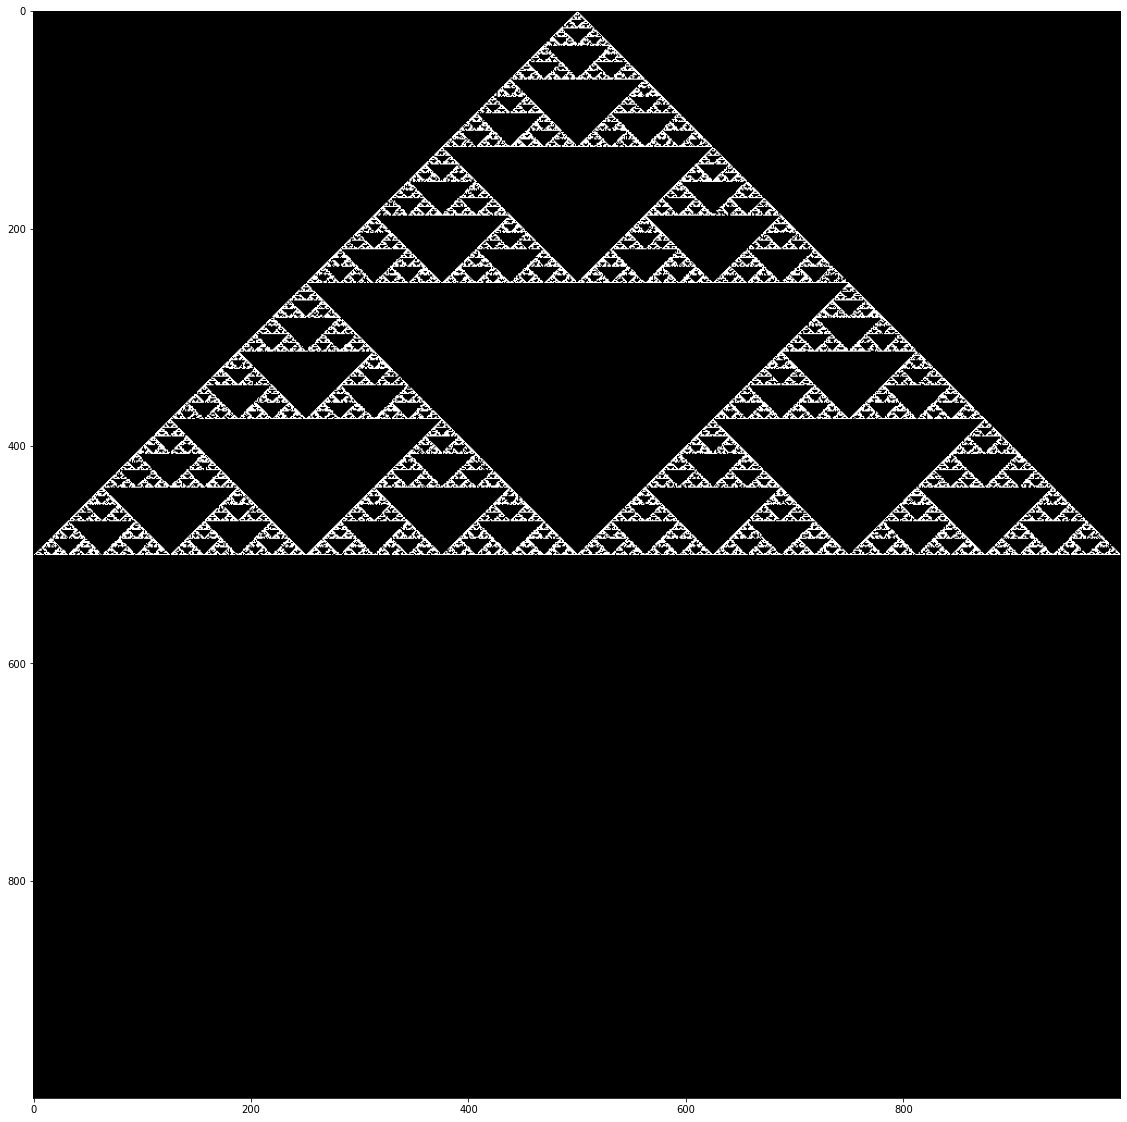

In [32]:
z = 0.5 + 0.*1j
max_iter = 100000
res = np.zeros([1000, 1000])
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
        res[- int(z.imag * 500) + 500][int(z.real * 500) + 500]= 1
        
        
plt.figure(figsize=(20, 20))
plt.imshow(res, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

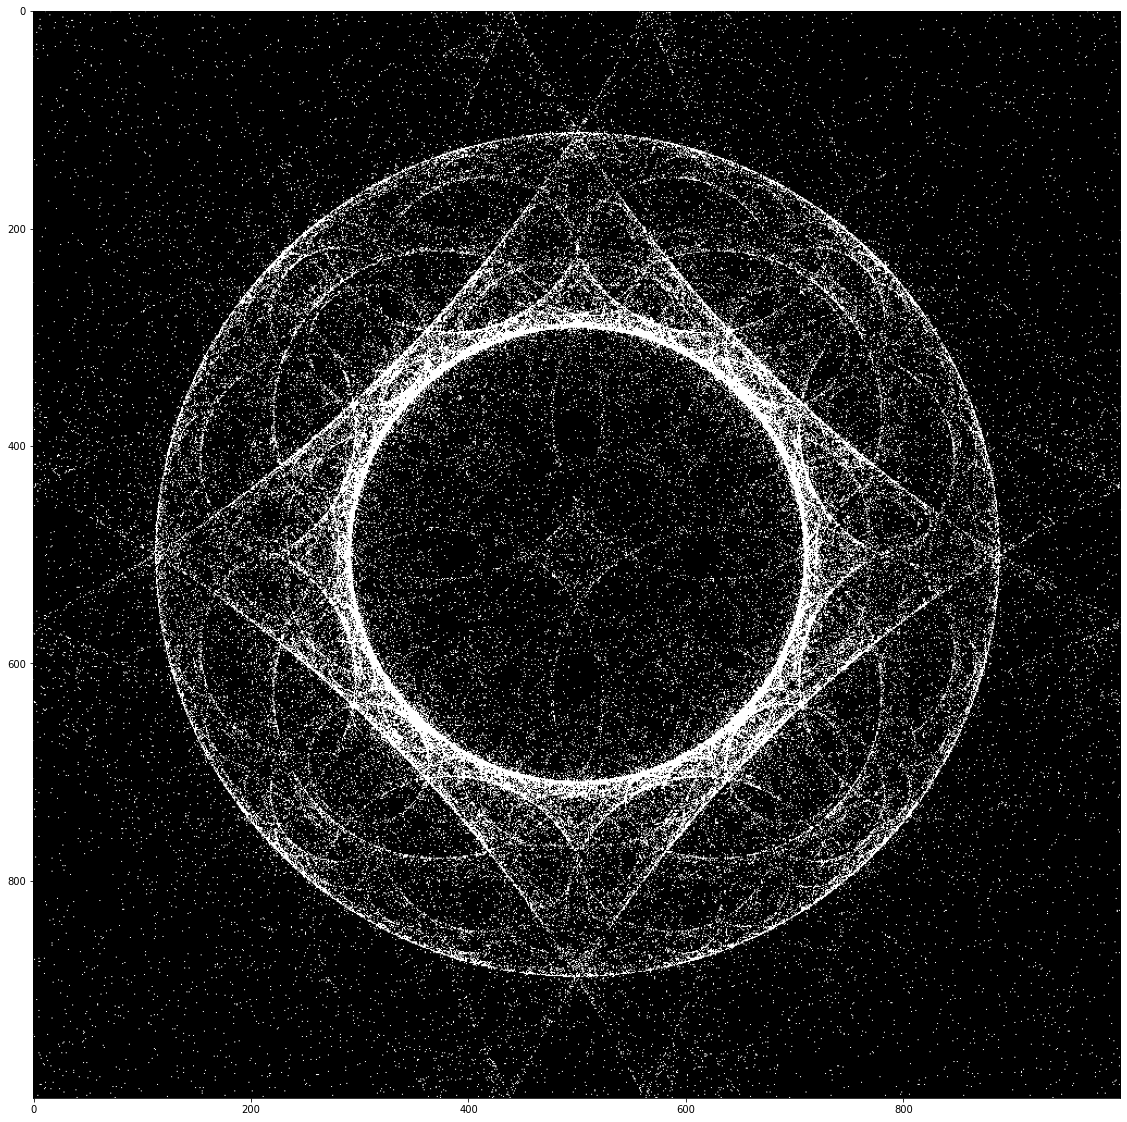

In [27]:
z = 0.4 + 0.5*1j
max_iter = 300000
k = 0.57
res = np.zeros([1000, 1000])
funcs = [
    (lambda t: geometric_inverse(t, 0.5 + 0.5 * 1j, k)),
    (lambda t: geometric_inverse(t, 0.5 - 0.5 * 1j, k)),
    (lambda t: geometric_inverse(t, - 0.5 + 0.5 * 1j, k)),
    (lambda t: geometric_inverse(t, - 0.5 - 0.5 * 1j, k)),
    (lambda t: geometric_inverse(t, - 0. - 0. * 1j, k))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 500:
        res[(- int(z.imag * 500) + 500) % 1000][(int(z.real * 500) + 500) % 1000] = 1
        
        
plt.figure(figsize=(20, 20))
plt.imshow(res, cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

21.2 µs ± 692 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
24.4 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
97.9 µs ± 41.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
117 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
389 µs ± 168 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
735 µs ± 273 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.55 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.43 ms ± 92.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.3 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.2 ms ± 812 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
44.4 ms ± 690 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
149 ms ± 33.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


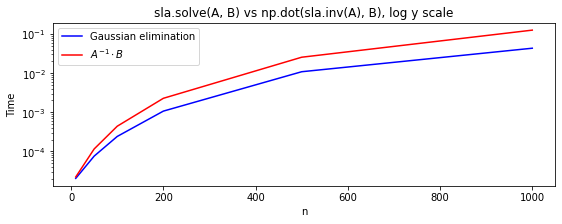

In [33]:
plt.figure(figsize=(9, 3))

gaussian_times1 = []
inv_times1 = []
ns = [10, 50, 100, 200, 500, 1000]
m = 10
for n in ns:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    res_gaus = %timeit -o sla.solve(A, B)
    gaussian_times1.append(res_gaus.best)
    res_inv = %timeit -o np.dot(sla.inv(A), B)
    inv_times1.append(res_inv.best)    


plt.semilogy(ns, gaussian_times1, color='blue', label='Gaussian elimination')
plt.semilogy(ns, inv_times1, color='red', label='$A^{-1} \cdot B$')
plt.title('sla.solve(A, B) vs np.dot(sla.inv(A), B), log y scale')
plt.ylabel('Time')
plt.xlabel('n')
plt.legend()


387 µs ± 164 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
457 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
608 µs ± 226 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
578 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.45 ms ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
938 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.36 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.95 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.8 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.91 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.9 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.09 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
34.1 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.8 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


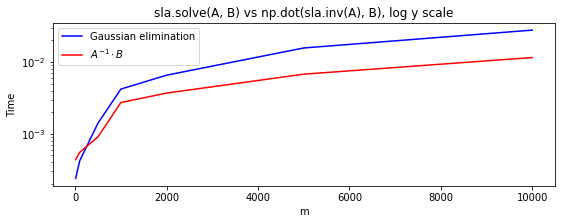

In [34]:
plt.figure(figsize=(9, 3))

gaussian_times2 = []
inv_times2 = []
n = 100
ms = [10, 100, 500, 1000, 2000, 5000, 10000]
for m in ms:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    res_gaus = %timeit -o sla.solve(A, B)
    gaussian_times2.append(res_gaus.best)
    res_inv = %timeit -o np.dot(sla.inv(A), B)
    inv_times2.append(res_inv.best)    

plt.semilogy(ms, gaussian_times2, color='blue', label='Gaussian elimination')
plt.semilogy(ms, inv_times2, color='red', label='$A^{-1} \cdot B$')
plt.title('sla.solve(A, B) vs np.dot(sla.inv(A), B), log y scale')
plt.ylabel('Time')
plt.xlabel('m')
plt.legend()

Сложность решения с помощью обратной матрицы : $O(n^3)$ - для обращения А (методом жордана-гаусса: https://ru.wikipedia.org/wiki/Обратная_матрица). $A^{-1} \cdot B$ занимает $O(n^2 \cdot m)$ (каждый элемент получившейся матрицы это попарно перемноженные n элементов, сложенные между собой, то есть O(n), таких элементов у нас $n\times m$ - итого сложность $O(n^2 \cdot m))$

Метод гаусса занимает $O(n^3)$ операций, чтобы привести А к единичному виду и получить ответ. 
Различия между методами можно увидеть на графиках